<h1>2022.03.31. 강의 시간내 실습</h1>

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [144]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [145]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [146]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [147]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [148]:
dataset = dataset.dropna()

In [149]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [150]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [151]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

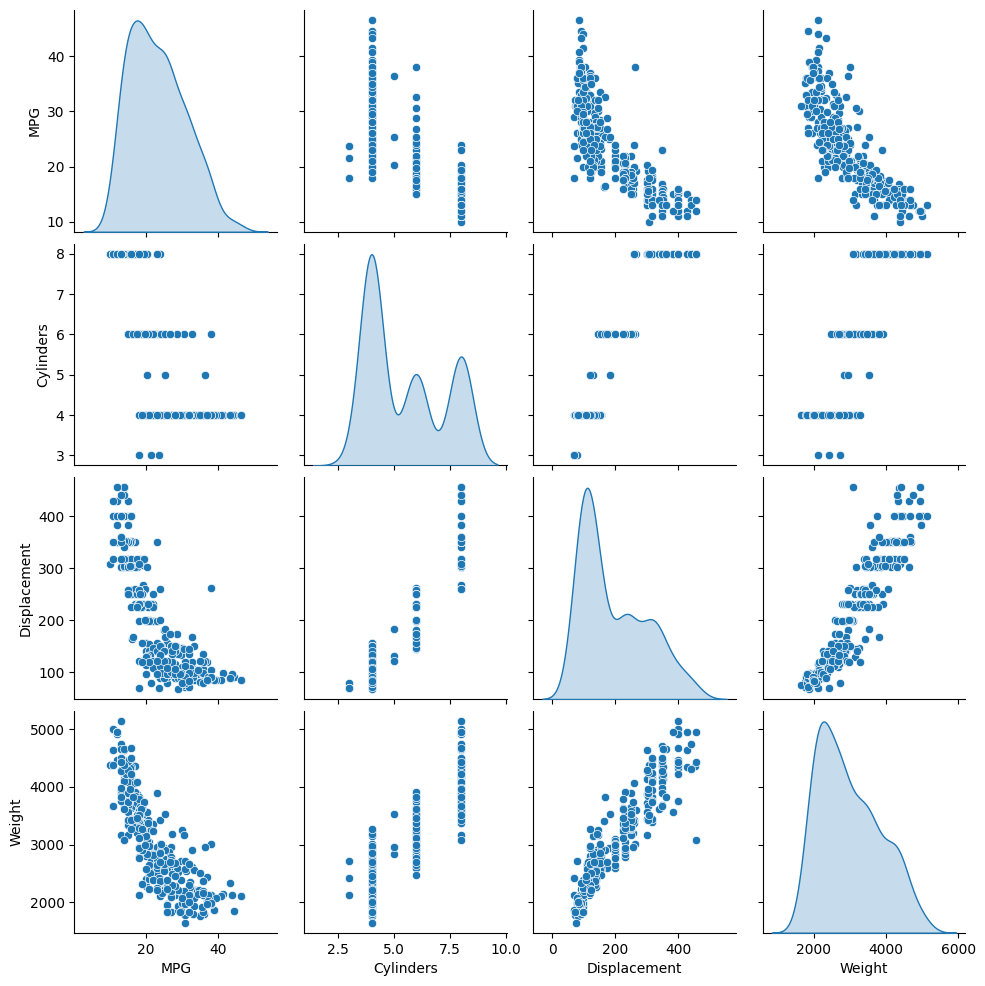

In [152]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [153]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [154]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [155]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


<h2>Regression</h2>

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [157]:
X = raw_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                 'Acceleration', 'Model Year', 'Origin']]
y = raw_dataset['MPG']

In [158]:
X.fillna(X.mean(), inplace=True)

C:\Users\김경훈\AppData\Local\Temp\ipykernel_10356\642802493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [159]:
y_binned = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=10)

<h3>DT</h3>

In [161]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


In [162]:
le = LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
pred_dt_encoded = le.transform(pred_dt)

In [163]:
mse = np.sqrt(mean_squared_error(pred_dt_encoded, y_test_encoded))
print('평균제곱근오차', mse)

평균제곱근오차 0.6614378277661477


<h3>RF</h3>

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


In [165]:
le = LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
pred_rf_encoded = le.transform(pred_dt)

In [166]:
mse = np.sqrt(mean_squared_error(pred_rf_encoded, y_test_encoded))
print('평균제곱근오차', mse)

평균제곱근오차 0.6614378277661477


<h3>LR</h3>

In [167]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.8427672955974843


c:\Users\김경훈\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
le = LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
pred_lr_encoded = le.transform(pred_dt)

In [169]:
mse = np.sqrt(mean_squared_error(pred_lr_encoded, y_test_encoded))
print('평균제곱근오차', mse)

평균제곱근오차 0.6614378277661477


<h3>SVM</h3>

In [170]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.7924528301886793


In [171]:
le = LabelEncoder()
le.fit(y_test)
y_test_encoded = le.transform(y_test)
pred_svm_encoded = le.transform(pred_dt)

In [172]:
mse = np.sqrt(mean_squared_error(pred_svm_encoded, y_test_encoded))
print('평균제곱근오차', mse)

평균제곱근오차 0.6614378277661477


In [173]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [174]:
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [175]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [176]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [177]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [178]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 85ms/step


array([[ 1.056],
       [ 0.596],
       [-1.949],
       [ 1.48 ],
       [ 1.339],
       [ 0.526],
       [ 1.586],
       [ 1.339],
       [ 0.349],
       [ 0.596]], dtype=float32)

In [179]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [180]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 9.06 s
Wall time: 7.42 s


In [181]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    
    plt.grid(True)

In [182]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804973,4.211716,95
96,3.812427,4.164822,96
97,3.805354,4.199975,97
98,3.804185,4.192977,98
99,3.803206,4.190556,99


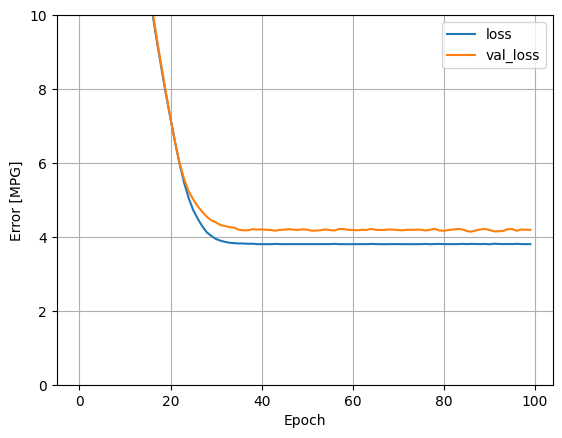

In [183]:
plot_loss(history)

In [184]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [185]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [186]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

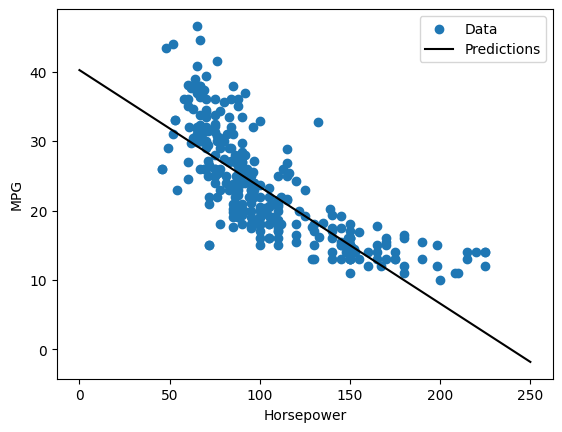

In [187]:
plot_horsepower(x, y)

<h2>Linear Regression</h2>

In [188]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [189]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 96ms/step


array([[ 0.286],
       [-0.256],
       [-1.407],
       [ 0.578],
       [ 1.385],
       [-0.983],
       [ 1.261],
       [-0.127],
       [-1.032],
       [ 0.87 ]], dtype=float32)

In [190]:
linear_model.layers[1].kernel

<tf.Variable 'dense_11/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.703],
       [ 0.26 ],
       [-0.002],
       [-0.294],
       [-0.58 ],
       [ 0.136],
       [ 0.526],
       [ 0.729],
       [ 0.114]], dtype=float32)>

In [191]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [192]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 9.61 s
Wall time: 7.62 s


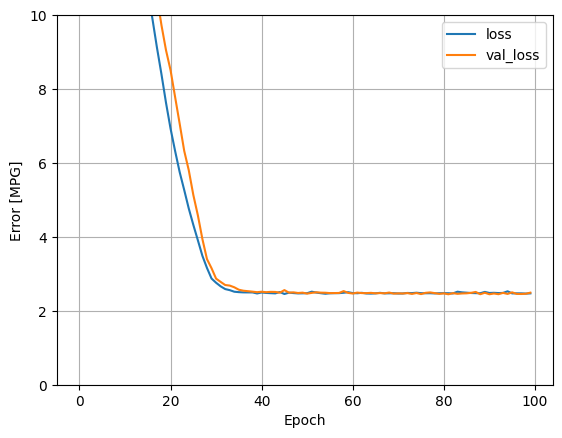

In [193]:
plot_loss(history)

In [194]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [195]:
def build_and_compile_model(norm):
    model = keras.Sequential([
    norm,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [196]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [197]:
dnn_horsepower_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 64)                128       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [198]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 10 s
Wall time: 8.19 s


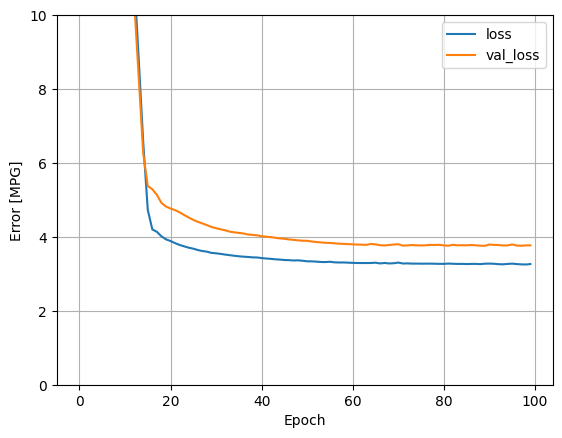

In [199]:
plot_loss(history)

In [200]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


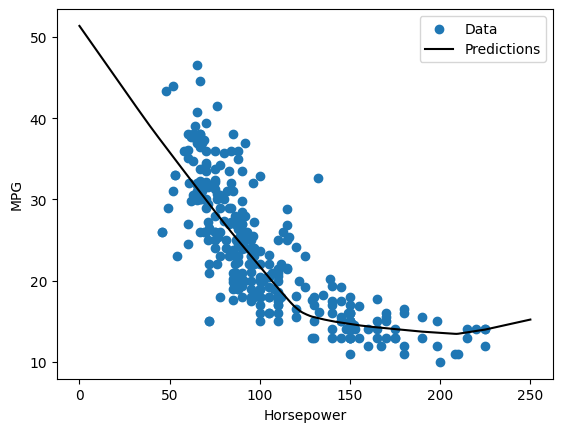

In [201]:
plot_horsepower(x, y)

In [202]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [203]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                640       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [204]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 10.2 s
Wall time: 8.04 s


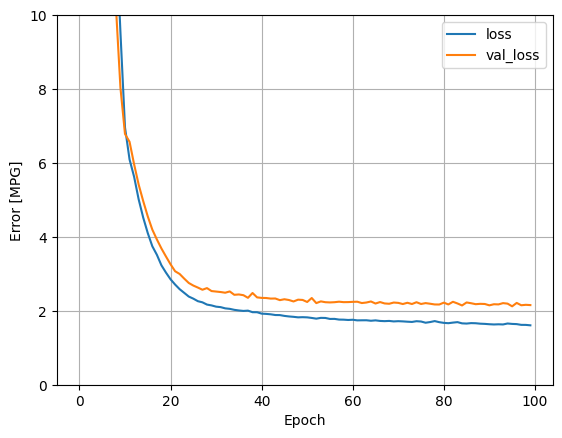

In [205]:
plot_loss(history)

In [206]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [207]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.640644
linear_model,2.524100
dnn_horsepower_model,2.966157
dnn_model,1.765751


3/3 [==============================] - 0s 2ms/step


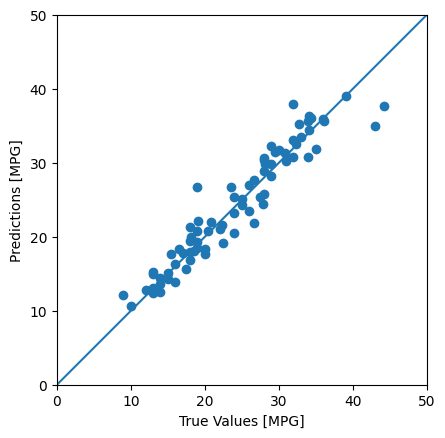

In [208]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

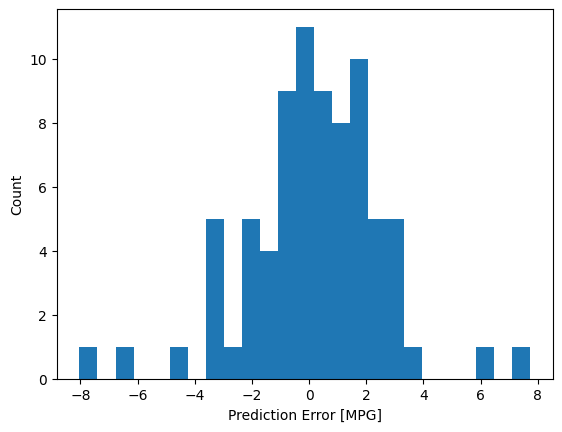

In [209]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [211]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.640644
linear_model,2.524100
dnn_horsepower_model,2.966157
dnn_model,1.765751
